# Data Preparation

Modify the data so ML algorithms can properly learn from it.

### Imports

In [1]:
# Import necessary libraries, functions, objects...
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


### Load dataset

In [2]:
df = pd.read_csv('house_pricing.csv', sep=',')

In [3]:
df.head()

,Split,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,...,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice,Electtrical
0,labeled,1,RL,6173,Pave,AllPub,Gtl,1Story,1967.0,1967,...,Unf,1,288,Y,0,0,0,NaN,125500.0,NaN
1,labeled,2,RL,11200,Pave,AllPub,Gtl,1Story,1985.0,1985,...,Unf,2,403,Y,26,0,0,NaN,180000.0,NaN
2,labeled,3,RL,11924,Pave,AllPub,Gtl,2Story,2005.0,2006,...,Fin,3,736,Y,21,0,0,NaN,345000.0,NaN
3,labeled,4,RM,6882,Pave,AllPub,Gtl,2Story,1914.0,2006,...,NaN,0,0,Y,0,115,0,NaN,127000.0,NaN
4,labeled,5,RL,4280,Pave,AllPub,Gtl,1Story,1913.0,2002,...,Unf,1,352,P,0,34,0,NaN,90350.0,NaN


## Select Data

After the previous exploration you may decide to use or not use some of the data sets.

For this exercise there is **no decision to make, you use the only data set we have**.

## Clean Data

### Remove unnecessary features (if any)

In [4]:
df.drop('Electtrical', axis=1, inplace=True)

In [5]:
df.head()


,Split,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
0,labeled,1,RL,6173,Pave,AllPub,Gtl,1Story,1967.0,1967,...,1967.0,Unf,1,288,Y,0,0,0,NaN,125500.0
1,labeled,2,RL,11200,Pave,AllPub,Gtl,1Story,1985.0,1985,...,1985.0,Unf,2,403,Y,26,0,0,NaN,180000.0
2,labeled,3,RL,11924,Pave,AllPub,Gtl,2Story,2005.0,2006,...,2005.0,Fin,3,736,Y,21,0,0,NaN,345000.0
3,labeled,4,RM,6882,Pave,AllPub,Gtl,2Story,1914.0,2006,...,NaN,NaN,0,0,Y,0,115,0,NaN,127000.0
4,labeled,5,RL,4280,Pave,AllPub,Gtl,1Story,1913.0,2002,...,1990.0,Unf,1,352,P,0,34,0,NaN,90350.0


Electrical

Tiene algunos NaN, y al mirar los datos se vio que esas casas son nuevas.

En este dataset, las casas nuevas suelen tener el tipo de sistema eléctrico "SBrkr".

Entonces: los NaN en Electrical no son un error, solo falta completarlos con "SBrkr".
Solución: rellenar esos NaN con "SBrkr".

In [6]:
print(df['Electrical'].unique())

df[df['Electrical'].isna()]



['SBrkr' 'FuseA' 'FuseF' nan 'FuseP']


,Split,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
96,labeled,97,FV,9000,Pave,AllPub,Gtl,1Story,2008.0,2008,...,2008.0,RFn,2,750,Y,168,0,0,NaN,262500.0
149,labeled,150,RL,13286,Pave,AllPub,Gtl,1Story,2007.0,2008,...,2007.0,Fin,3,768,Y,64,0,0,NaN,320000.0
156,labeled,157,RL,10991,Pave,AllPub,Gtl,1Story,2007.0,2007,...,2007.0,Fin,3,722,Y,36,0,0,NaN,239000.0
213,labeled,214,RL,9735,Pave,AllPub,Gtl,SLvl,2006.0,2007,...,2007.0,Fin,2,400,Y,0,0,0,NaN,167500.0
259,labeled,260,RM,8546,Pave,AllPub,Gtl,1Story,2003.0,2004,...,2003.0,RFn,2,440,Y,64,0,0,NaN,140000.0
279,labeled,280,RL,13072,Pave,AllPub,Gtl,1Story,2005.0,2005,...,2005.0,Unf,2,484,Y,0,0,0,NaN,142500.0
280,labeled,281,RM,4426,Pave,AllPub,Gtl,1Story,2004.0,2004,...,2004.0,RFn,2,420,Y,0,0,0,NaN,149300.0
291,labeled,292,RL,2628,Pave,AllPub,Gtl,2Story,2003.0,2003,...,2003.0,RFn,2,474,Y,27,0,0,NaN,175500.0
311,labeled,312,RL,13072,Pave,AllPub,Gtl,1Story,2004.0,2004,...,2006.0,Unf,2,576,Y,50,0,0,NaN,158000.0
321,labeled,322,FV,8640,Pave,AllPub,Gtl,1Story,2009.0,2009,...,2009.0,RFn,2,552,Y,112,0,0,NaN,229456.0


In [7]:
# Busca los valores vacíos (NaN) en la columna Electrical.

# Los reemplaza por "SBrkr". Y guarda el cambio directamente en el df (gracias al inplace=True).

df['Electrical'].fillna('SBrkr', inplace=True)


C:\Users\Alumne_mati1\AppData\Local\Temp\ipykernel_13636\3588500651.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Electrical'].fillna('SBrkr', inplace=True)


In [8]:
df['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP'], dtype=object)

### Deal with null or erroneous values (if any)

GarageType, GarageYrBlt, GarageFinish

Las tres columnas están relacionadas: cuando una está vacía, las otras también.

Y según la descripción del dataset, eso pasa cuando la casa no tiene garaje.

O sea, los NaN no son errores, simplemente significan “no hay garaje”.
Solución: podrías crear una variable nueva tipo HasGarage (sí/no),
o simplemente dejar los NaN sabiendo que significan “sin garaje”.

In [9]:
df['GarageType'].unique()

array(['Attchd', 'BuiltIn', nan, 'Detchd', 'Basment', '2Types', 'CarPort'],
      dtype=object)

In [10]:

pd.set_option('display.max_columns', None)
df[df['GarageType'].isna()]


,Split,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,Foundation,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
3,labeled,4,RM,6882,Pave,AllPub,Gtl,2Story,1914.0,2006,Gable,PConc,684,GasA,Y,SBrkr,773,582,1355,0,1,3,1,7,0,NaN,NaN,NaN,0,0,Y,0,115,0,NaN,127000.0
20,labeled,21,RM,1491,Pave,AllPub,Gtl,SFoyer,1972.0,1972,Gable,CBlock,630,GasA,Y,SBrkr,630,0,630,1,1,1,1,3,0,NaN,NaN,NaN,0,0,Y,24,0,0,NaN,75500.0
29,labeled,30,RH,8525,Pave,AllPub,Gtl,2Story,1911.0,1950,Gable,PConc,940,GasA,N,FuseA,1024,940,1964,0,1,4,1,7,0,NaN,NaN,NaN,0,0,N,192,0,0,NaN,130000.0
94,labeled,95,RL,9400,Pave,AllPub,Gtl,2Story,1971.0,1971,Mansard,CBlock,912,GasA,Y,SBrkr,912,912,1824,0,2,4,2,8,0,NaN,NaN,NaN,0,0,Y,0,0,0,NaN,139000.0
99,labeled,100,RM,1533,Pave,AllPub,Gtl,2Story,1970.0,2008,Gable,CBlock,546,GasA,Y,SBrkr,798,546,1344,0,1,3,1,6,1,NaN,NaN,NaN,0,0,Y,0,0,0,NaN,97000.0
115,labeled,116,RL,8000,Pave,AllPub,Gtl,1Story,1961.0,1961,Gable,CBlock,1800,GasA,N,SBrkr,1800,0,1800,0,2,6,2,10,0,NaN,NaN,NaN,0,0,Y,0,0,0,NaN,141000.0
120,labeled,121,RH,7082,Pave,AllPub,Gtl,2Story,1916.0,1995,Gable,PConc,686,GasA,Y,SBrkr,948,980,1928,0,2,5,2,10,0,NaN,NaN,NaN,0,0,N,0,228,0,NaN,160000.0
143,labeled,144,RM,6120,Pave,AllPub,Gtl,1Story,1936.0,1950,Gable,BrkTil,264,Grav,N,FuseA,800,0,800,0,1,1,1,4,1,NaN,NaN,NaN,0,0,N,0,0,0,NaN,60000.0
144,labeled,145,RL,8335,Pave,AllPub,Gtl,1Story,1954.0,1954,Gable,Slab,0,GasA,Y,SBrkr,1124,0,1124,0,1,3,1,5,1,NaN,NaN,NaN,0,0,N,36,190,0,NaN,93000.0
145,labeled,146,RM,1680,Pave,AllPub,Gtl,2Story,1971.0,1971,Gable,CBlock,672,GasA,Y,SBrkr,672,546,1218,0,1,3,1,7,0,NaN,NaN,NaN,0,0,N,0,0,0,NaN,91500.0


In [11]:

df.head()
df['GarageType']   = df['GarageType'].fillna('NoGarage')
df['GarageYrBlt']  = df['GarageYrBlt'].fillna(0)
df['GarageFinish'] = df['GarageFinish'].fillna('NoGarage')



MiscFeature

Tiene muchísimos NaN (casi todos).

Esa columna representa cosas raras o poco comunes (por ejemplo, si la casa tiene un cobertizo o algo extra).

Pero como casi todos los valores están vacíos, no aporta mucho.

Solución: se puede eliminar, o reemplazar por una columna más simple, por ejemplo HasShed (1 si tiene, 0 si no)

In [12]:
df['MiscFeature'].value_counts(dropna=False)


MiscFeature
NaN     952
Shed     38
Othr      1
TenC      1
Name: count, dtype: int64

In [13]:
df[df['MiscFeature'] == 'Othr']
df[df['MiscFeature'] == 'TenC']

,Split,Id,MSZoning,LotArea,Street,Utilities,LandSlope,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,Foundation,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice
834,leaderboard,835,RL,16692,Pave,AllPub,Gtl,2Story,1978.0,1978,Gable,CBlock,1392,GasA,Y,SBrkr,1392,1392,2784,1,3,5,1,12,2,Attchd,1978.0,RFn,2,564,Y,112,0,519,TenC,NaN


In [14]:
df.groupby('MSZoning')['SalePrice'].agg(['mean', 'median'])


,mean,median
MSZoning,,
C (all),102776.000000,102776.0
FV,200894.384615,197000.0
RH,132166.666667,130000.0
RL,170501.932566,159750.0
RM,124252.430657,124000.0


In [15]:
df['MSZoning'].value_counts(dropna=False)

MSZoning
RL         761
RM         165
FV          52
RH          12
C (all)      2
Name: count, dtype: int64

In [16]:
mszoning_map = {
    'C': 0.0,   # Commercial
    'I': 0.0,   # Industrial
    'A': 0.5,   # Agriculture
    'RH': 1.0,  # Residential High Density
    'RM': 2.0,  # Residential Medium Density
    'RP': 2.5,  # Residential Low Density Park
    'RL': 3.0,  # Residential Low Density (suburbano premium)
    'FV': 3.2   # Floating Village (ribera, suele ser caro/escaso)
}

# Crear numérica y (si quieres) eliminar la original
df['mszoning_num'] = df['MSZoning'].map(mszoning_map).astype('float')
df = df.drop(columns=['MSZoning'])  # quita la categórica
print(df['mszoning_num'].value_counts(dropna=False).sort_index())


mszoning_num
1.0     12
2.0    165
3.0    761
3.2     52
NaN      2
Name: count, dtype: int64


Mantenere TenC come categoria separata in MiscFeature (per non perdere l’informazione di lusso).

Pulire i valori rari come Othr, se vuoi semplificare.

Aggiungere una nuova colonna HasMiscFeature con 0 e 1:

1 → la casa ha qualcosa (Shed, TenC, Othr, ecc.)

0 → la casa non ha niente (NaN)

In [17]:
# 1️⃣ Pulire MiscFeature: raggruppare valori rari (se vuoi)
df['MiscFeature'] = df['MiscFeature'].replace({'Othr': 'Shed'})  # opzionale
df['MiscFeature'] = df['MiscFeature'].fillna('None')  # sostituisce i NaN con "None"

# 2️⃣ Creare la colonna binaria
df['HasMiscFeature'] = (df['MiscFeature'] != 'None').astype(int)

df['MiscFeature'].value_counts(dropna=False)


MiscFeature
None    952
Shed     39
TenC      1
Name: count, dtype: int64

### Deal with duplicated rows that are errors (if any)

In [18]:
df['MiscFeature'] = df['MiscFeature'].replace({'None': 0, 'Shed': 1, 'TenC': 2})
df['MiscFeature'].value_counts(dropna=False)

C:\Users\Alumne_mati1\AppData\Local\Temp\ipykernel_13636\1580806417.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MiscFeature'] = df['MiscFeature'].replace({'None': 0, 'Shed': 1, 'TenC': 2})


MiscFeature
0    952
1     39
2      1
Name: count, dtype: int64

In [19]:
df['SalePrice'].value_counts(dropna=False)

SalePrice
NaN         198
140000.0     14
135000.0     12
130000.0     10
110000.0     10
           ... 
193500.0      1
185500.0      1
134800.0      1
275000.0      1
75500.0       1
Name: count, Length: 418, dtype: int64

### Decide what to do with outliers (if any)

Normally during this step you may decide to remove or change some outliers. However, **for this exercise do not remove any outliers**, leave them as they are.

## Construct Data

Decide if you want to create new features from the existing ones. You can be as creative as you want.

## Integrate Data

Decide if you want to integrate data from other sources.

**This is not needed for the exercises.**.

## Feature Engineering

### Encoding

Apply the encodings that you consider more appropriate for the categorical variables.

1.5Fin / 1.5Unf
Tienen una planta principal + medio nivel superior (ático o segundo piso parcial)
“1.5 pisos” → el segundo nivel no cubre toda la planta inferior
Son casas “verticales” tradicionales.

2Story / 2.5Fin / 2.5Unf
Tienen dos plantas completas (y a veces un ático parcial o completo)
2 o 2.5 pisos completos
Claramente casas de varios niveles regulares.

SFoyer / SLvl
Su característica no es cuántos pisos tienen, sino cómo están divididos internamente (niveles a medias alturas)
Se cuentan como niveles intermedios (split levels), no pisos completos
Son casas de “niveles desfasados”.

Los split-levels surgieron como alternativa moderna y suburbana a las casas tradicionales de 2 pisos.

Misma superficie útil, pero distribuida en medios niveles.

Más dinámica visualmente.

Muy popular entre 1950–1980 en barrios suburbanos.

Por eso, los sistemas de clasificación de viviendas los tratan como categorías aparte, no como “1.5 o 2 pisos”.

In [20]:
# Diccionario con tu escala personalizada
housestyle_map_custom = {
    '1Story': 1.0,
    '1.5Unf': 1.5,
    '1.5Fin': 2.0,
    'SFoyer': 3.0,
    'SLvl': 4.0,
    '2Story': 5.0,
    '2.5Unf': 5.5,
    '2.5Fin': 6.0
}

# Crear la nueva columna numérica
df['HouseStyle_num'] = df['HouseStyle'].map(housestyle_map_custom)

 

# Verificar resultados
print(df[['HouseStyle', 'HouseStyle_num']].drop_duplicates().sort_values('HouseStyle_num'))



    HouseStyle  HouseStyle_num
0       1Story             1.0
98      1.5Unf             1.5
8       1.5Fin             2.0
20      SFoyer             3.0
15        SLvl             4.0
2       2Story             5.0
240     2.5Unf             5.5
451     2.5Fin             6.0


In [21]:
print(df['HouseStyle'].value_counts())


HouseStyle
1Story    503
2Story    290
1.5Fin     99
SLvl       48
SFoyer     33
1.5Unf     12
2.5Unf      5
2.5Fin      2
Name: count, dtype: int64


In [22]:
df = df.drop(columns=['HouseStyle'])

<Figure size 800x500 with 0 Axes>

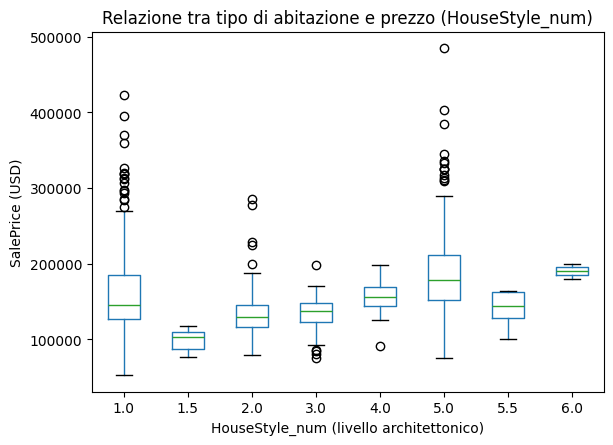

In [23]:


plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='SalePrice', by='HouseStyle_num', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di abitazione e prezzo (HouseStyle_num)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('HouseStyle_num (livello architettonico)')
plt.ylabel('SalePrice (USD)')

plt.show()


In [24]:
# Analisi descrittiva per HouseStyle_num
analysis = (
    df.groupby('HouseStyle_num')['SalePrice']
    .agg(['count', 'mean', 'median', 'min', 'max', 'std'])
    .round(0)
    .sort_index()
)

# Mostra la tabella in ordine crescente di complessità architettonica
print("\n📊 Analisi descrittiva per tipo di abitazione (HouseStyle_num)\n")
print(analysis)



📊 Analisi descrittiva per tipo di abitazione (HouseStyle_num)

                count      mean    median       min       max      std
HouseStyle_num                                                        
1.0               400  160502.0  145000.0   52500.0  423000.0  54226.0
1.5                 9   99522.0  103200.0   76000.0  118000.0  13910.0
2.0                85  136038.0  130000.0   79000.0  285000.0  35628.0
3.0                23  131469.0  137000.0   75500.0  198500.0  30578.0
4.0                38  155634.0  156500.0   91000.0  197900.0  21551.0
5.0               232  185939.0  177750.0   75000.0  485000.0  59708.0
5.5                 5  140000.0  144000.0  101000.0  164000.0  26391.0
6.0                 2  189750.0  189750.0  179500.0  200000.0  14496.0


In [25]:
# Accorpare le categorie rare (2.5Unf e 2.5Fin) a 2Story
df['HouseStyle_num'] = df['HouseStyle_num'].replace({5.5: 5.0, 6.0: 5.0})

# Controllare i nuovi gruppi
print(df['HouseStyle_num'].value_counts().sort_index())


HouseStyle_num
1.0    503
1.5     12
2.0     99
3.0     33
4.0     48
5.0    297
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

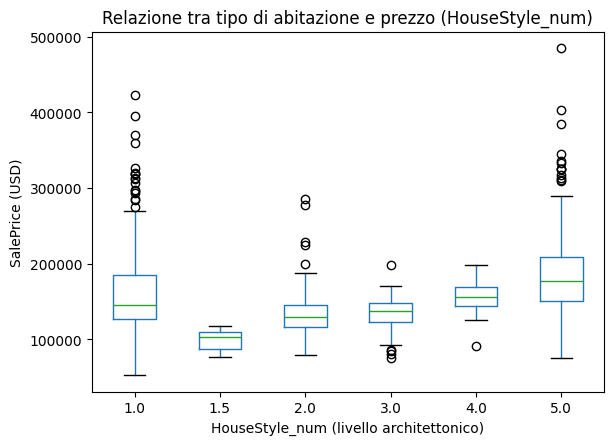

In [26]:
plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='SalePrice', by='HouseStyle_num', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di abitazione e prezzo (HouseStyle_num)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('HouseStyle_num (livello architettonico)')
plt.ylabel('SalePrice (USD)')

plt.show()


Pave	Calle pavimentada (asfalto, hormigón)
Grvl	Calle de grava (no pavimentada)

In [27]:
print(df['Street'].unique())
print(df.groupby('Street')['SalePrice'].describe().round(0))


['Pave' 'Grvl']
        count      mean      std       min       25%       50%       75%  \
Street                                                                     
Grvl      3.0  152483.0  66358.0  110000.0  114250.0  118500.0  173725.0   
Pave    791.0  163537.0  54979.0   52500.0  128000.0  152000.0  185950.0   

             max  
Street            
Grvl    228950.0  
Pave    485000.0  


In [28]:
# 1️⃣ Crear nueva columna binaria
df['st_grvl_pave'] = df['Street'].map({'Grvl': 0, 'Pave': 1})

# 2️⃣ Eliminar la columna original
df = df.drop(columns=['Street'])

# 3️⃣ Verificar que el cambio se hizo correctamente
print(df[['st_grvl_pave']].head(10))
#

print(df['st_grvl_pave'].value_counts())



   st_grvl_pave
0             1
1             1
2             1
3             1
4             1
5             1
6             1
7             1
8             1
9             1
st_grvl_pave
1    988
0      4
Name: count, dtype: int64


'Utilities
solo compaiono “AllPub” e “NoSeWa”, quindi:

AllPub = 1 → pieno accesso ai servizi pubblici

NoSeWa = 0 → mancanza di rete fognaria e acqua pubblica

In [29]:
print(df['Utilities'].value_counts())
print(df['Utilities'].unique())



Utilities
AllPub    991
NoSeWa      1
Name: count, dtype: int64
['AllPub' 'NoSeWa']


In [30]:
# 1️⃣ Crea la nuova colonna binaria
df['ut_allpub_nosewa'] = df['Utilities'].map({'AllPub': 1, 'NoSeWa': 0})

# 2️⃣ Elimina la colonna originale
df = df.drop(columns=['Utilities'])

# 3️⃣ Verifica il risultato
print(df['ut_allpub_nosewa'].value_counts())


ut_allpub_nosewa
1    991
0      1
Name: count, dtype: int64


LandSlope: Slope of property
		Gtl
Gentle slope → pendenza lieve
Terreno regolare, facilmente edificabile
Neutro o positivo                     
Mod
Moderate slope → pendenza media
Potrebbe richiedere adattamenti (scale, muri di contenimento)
Ligeramente negativo
Sev
Severe slope → pendenza ripida
Difficile da edificare, drenaggio complesso, accesso limitato
Negativo

In [31]:
print(df['LandSlope'].value_counts())
print(df['LandSlope'].unique())

LandSlope
Gtl    955
Mod     34
Sev      3
Name: count, dtype: int64
['Gtl' 'Mod' 'Sev']


In [32]:
# Crear nueva columna ordinal
df['land_slope_ord'] = df['LandSlope'].map({'Gtl': 0, 'Mod': 1, 'Sev': 2})

# Eliminar la columna original
df = df.drop(columns=['LandSlope'])

# Verificar
print(df['land_slope_ord'].value_counts())


land_slope_ord
0    955
1     34
2      3
Name: count, dtype: int64


RoofStyle         object
-Flat	Techo plano	Moderno, más económico, común en edificios urbanos	 Neutro / leve negativo
-Gable	Techo a dos aguas	Tradicional, simple, fácil de construir y mantener	Positivo (estándar suburbano)
-Hip	Techo a cuatro aguas	Más costoso, mejor drenaje, aspecto más “premium”	 Positivo / alto
-Gambrel	Techo tipo granero (doble pendiente)	Estilo rural, graneros, casas de campo	 -Moderado / rural
-Mansard	Techo francés, doble pendiente con ático	Estilo histórico, casas antiguas	Variable / puede ser alto en zonas patrimoniales
- Shed	Una sola pendiente	Estilo moderno o de cabaña	 Neutro / variable  


RoofStyle Valor numérico Justificación Flat 0 Más económico, menor drenaje Gambrel 1 Rústico, poco común Gable 2 Estándar, buen equilibrio Shed 2 Similar al Gable en coste / percepción (si existe en tus datos) Hip 3 Más caro y “premium” Mansard 3.5 Estilo histórico / lujoso

In [33]:
print(df['RoofStyle'].value_counts())


RoofStyle
Gable      821
Hip        158
Mansard      7
Gambrel      3
Flat         3
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

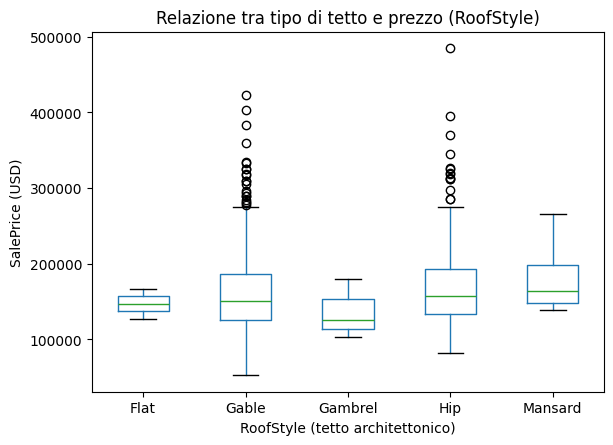

In [34]:

plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='SalePrice', by='RoofStyle', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di tetto e prezzo (RoofStyle)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('RoofStyle (tetto architettonico)')
plt.ylabel('SalePrice (USD)')

plt.show()

In [35]:
roofstyle_map_refined = {
    'Flat': 0,
    'Gambrel': 1,
    'Gable': 2,
    'Shed': 2,
    'Hip': 3,
    'Mansard': 3.5
}

df['roof_style_num'] = df['RoofStyle'].map(roofstyle_map_refined)
df = df.drop(columns=['RoofStyle'])

print(df['roof_style_num'].value_counts().sort_index())


roof_style_num
0.0      3
1.0      3
2.0    821
3.0    158
3.5      7
Name: count, dtype: int64


Foundation    

Slab	Losa sin sótano	Económico	 Bajo
Wood	Base de madera	Antiguo, frágil	 Bajo
CBlock	Bloques de hormigón	Común, económico	 Medio-bajo
BrkTil	Ladrillo y teja	Tradicional, mejor acabado	 Medio
Stone	Piedra	Raro, histórico, costoso	 Alto
PConc	Hormigón vertido	Moderno, premium	 Muy alto

In [36]:
print(df['Foundation'].value_counts())

Foundation
CBlock    468
PConc     417
BrkTil     87
Slab       16
Stone       4
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

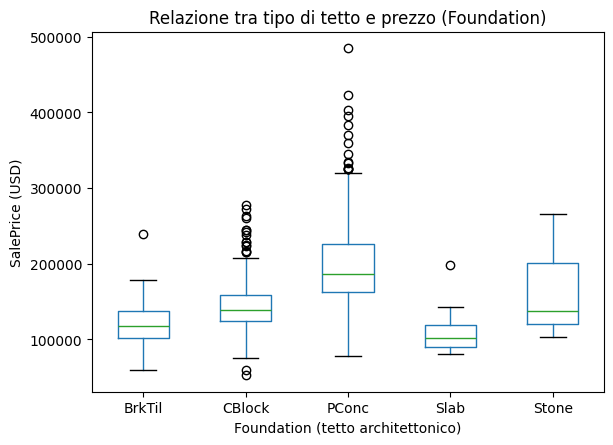

In [37]:

plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='SalePrice', by='Foundation', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di tetto e prezzo (Foundation)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('Foundation (tetto architettonico)')
plt.ylabel('SalePrice (USD)')

plt.show()


In [38]:
foundation_map_final = {
    'Slab': 0,
    'Wood': 0.5,
    'CBlock': 1,
    'BrkTil': 2,
    'Stone': 2.7,
    'PConc': 3
}

df['foundation_num'] = df['Foundation'].map(foundation_map_final)
df = df.drop(columns=['Foundation'])

print(df['foundation_num'].value_counts().sort_index())


foundation_num
0.0     16
1.0    468
2.0     87
2.7      4
3.0    417
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

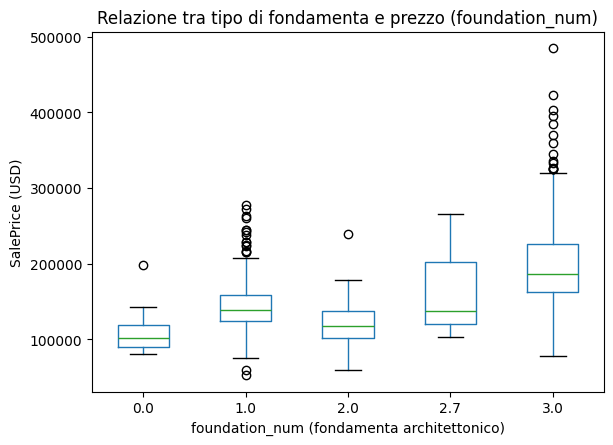

In [39]:
plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='SalePrice', by='foundation_num', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di fondamenta e prezzo (foundation_num)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('foundation_num (fondamenta architettonico)')
plt.ylabel('SalePrice (USD)')

plt.show()

In [40]:
# Actualiza los valores numéricos existentes según la nueva escala
df['foundation_num'] = df['foundation_num'].replace({
    0: 0,      # Slab (sin cambio)
    0.5: 0.5,  # Wood (sin cambio)
    1: 2,      # CBlock → ahora será 2
    2: 1,      # BrkTil → ahora será 1
    2.7: 2.7,  # Stone (igual)
    3: 3       # PConc (igual)
})

# Confirmar que se aplicó correctamente
print(df[['foundation_num']].value_counts().sort_index())


foundation_num
0.0                16
1.0                87
2.0               468
2.7                 4
3.0               417
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

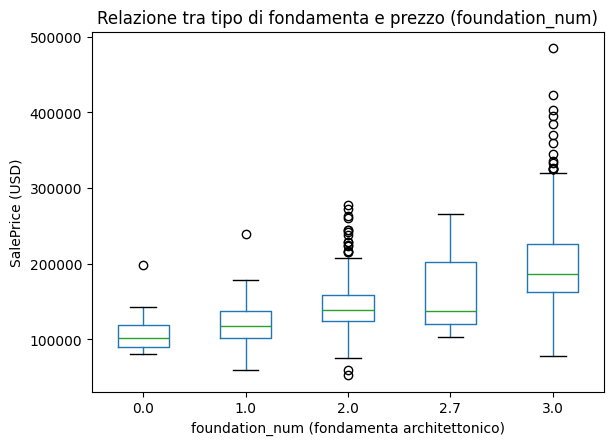

In [41]:
plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='SalePrice', by='foundation_num', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di fondamenta e prezzo (foundation_num)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('foundation_num (fondamenta architettonico)')
plt.ylabel('SalePrice (USD)')

plt.show()

Heating

In [42]:
print(df['Heating'].value_counts())

Heating
GasA     973
GasW      10
Grav       5
Wall       3
Floor      1
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

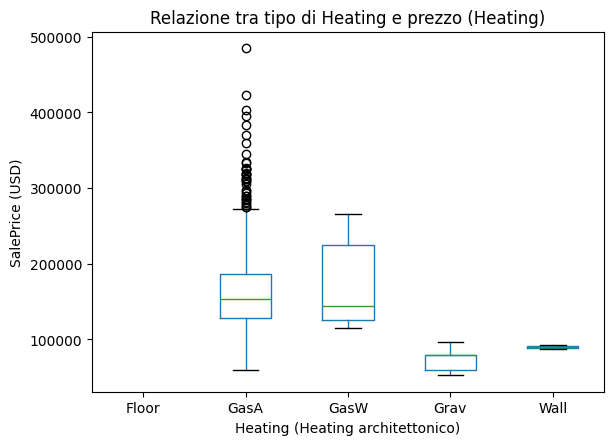

In [43]:
plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='SalePrice', by='Heating', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di Heating e prezzo (Heating)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('Heating (Heating architettonico)')
plt.ylabel('SalePrice (USD)')

plt.show()

In [44]:
heating_map = {
    'Floor': 0,     # Sistema antiguo (no moderno radiante)
    'Wall': 0.5,    
    'Grav': 0.8,
    'GasW': 2,
    'OthW': 2.5,
    'GasA': 3
}

df['heating_num'] = df['Heating'].map(heating_map)
df = df.drop(columns=['Heating'])

print(df['heating_num'].value_counts().sort_index())


heating_num
0.0      1
0.5      3
0.8      5
2.0     10
3.0    973
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

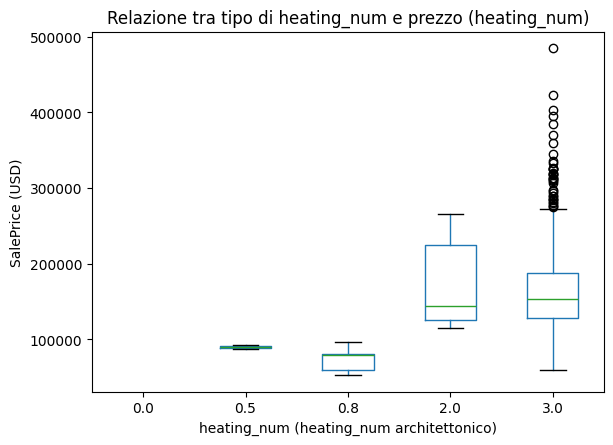

In [45]:
plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='SalePrice', by='heating_num', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di heating_num e prezzo (heating_num)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('heating_num (heating_num architettonico)')
plt.ylabel('SalePrice (USD)')

plt.show()

<Figure size 800x500 with 0 Axes>

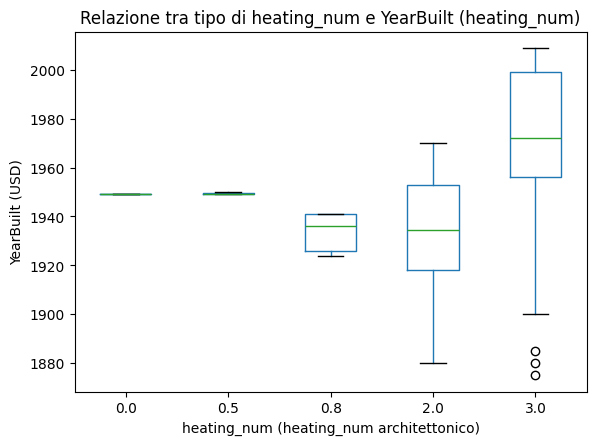

In [46]:
plt.figure(figsize=(8,5))

# Crea il boxplot
df.boxplot(column='YearBuilt', by='heating_num', grid=False)

# Titoli e labels
plt.title('Relazione tra tipo di heating_num e YearBuilt (heating_num)')
plt.suptitle('')  # Rimuove il titolo automatico di Pandas
plt.xlabel('heating_num (heating_num architettonico)')
plt.ylabel('YearBuilt (USD)')

plt.show()

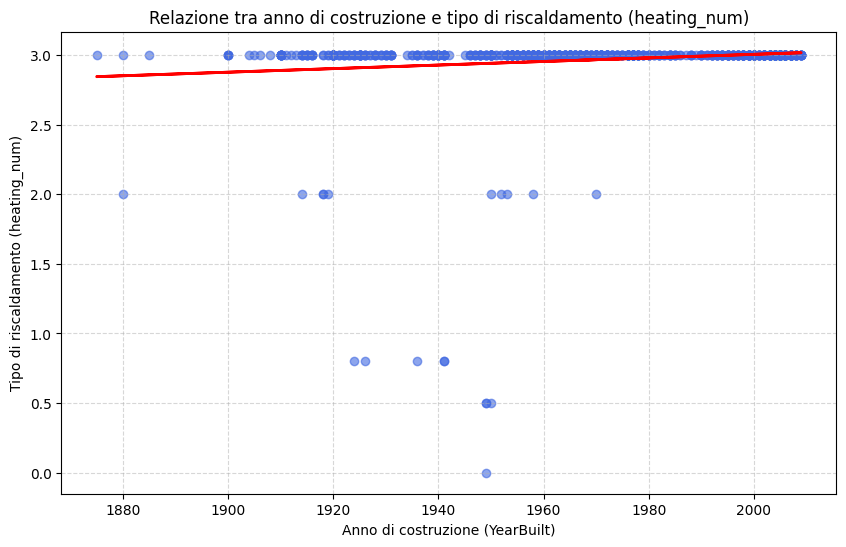

In [47]:


plt.figure(figsize=(10,6))

# Scatter plot
plt.scatter(df['YearBuilt'], df['heating_num'], alpha=0.6, color='royalblue')

# Aggiungiamo una linea di tendenza (regressione lineare)
z = np.polyfit(df['YearBuilt'], df['heating_num'], 1)
p = np.poly1d(z)
plt.plot(df['YearBuilt'], p(df['YearBuilt']), color='red', linewidth=2)

# Titoli e labels
plt.title('Relazione tra anno di costruzione e tipo di riscaldamento (heating_num)')
plt.xlabel('Anno di costruzione (YearBuilt)')
plt.ylabel('Tipo di riscaldamento (heating_num)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Electrical     

In [48]:
print(df['Electrical'].value_counts())

Electrical
SBrkr    903
FuseA     70
FuseF     17
FuseP      2
Name: count, dtype: int64


<Figure size 600x500 with 0 Axes>

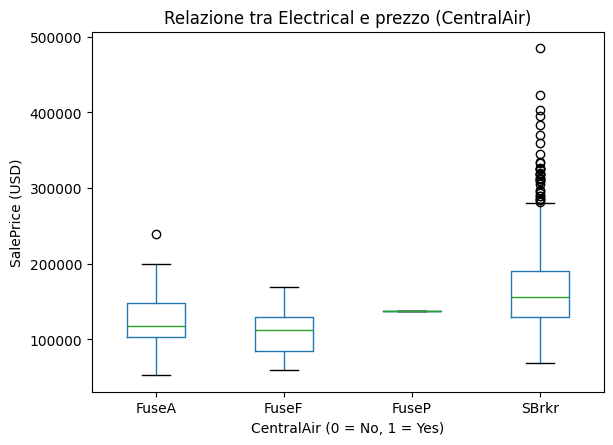

In [49]:
plt.figure(figsize=(6,5))
df.boxplot(column='SalePrice', by='Electrical', grid=False)
plt.title('Relazione tra Electrical e prezzo (CentralAir)')
plt.suptitle('')
plt.xlabel('CentralAir (0 = No, 1 = Yes)')
plt.ylabel('SalePrice (USD)')
plt.show()


In [50]:
# Mappa numerica basata sul livello tecnologico
electrical_map = {
    'FuseP': 0,
    'FuseF': 1,
    'FuseA': 2,
    'Mix': 2.5,
    'SBrkr': 3
}

# Crea nuova colonna numerica
df['electrical_num'] = df['Electrical'].map(electrical_map)

# Rimuovi la colonna originale
df = df.drop(columns=['Electrical'])

# Controlla i risultati
print(df['electrical_num'].value_counts().sort_index())


electrical_num
0.0      2
1.0     17
2.0     70
3.0    903
Name: count, dtype: int64


<Figure size 600x500 with 0 Axes>

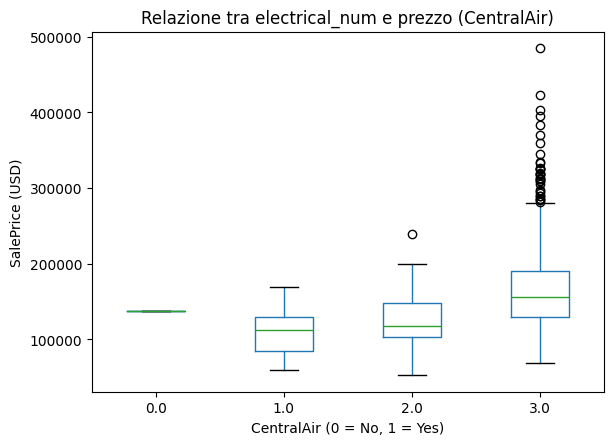

In [51]:
plt.figure(figsize=(6,5))
df.boxplot(column='SalePrice', by='electrical_num', grid=False)
plt.title('Relazione tra electrical_num e prezzo (CentralAir)')
plt.suptitle('')
plt.xlabel('CentralAir (0 = No, 1 = Yes)')
plt.ylabel('SalePrice (USD)')
plt.show()


### Binning



Apply binning to some columns if you consider it appropriate.
N	No central air
Y	Yes central air	

In [52]:
df['central_air_num'] = df['CentralAir'].map({'N': 0, 'Y': 1})
df = df.drop(columns=['CentralAir'])

print(df['central_air_num'].value_counts())


central_air_num
1    932
0     60
Name: count, dtype: int64


<Figure size 600x500 with 0 Axes>

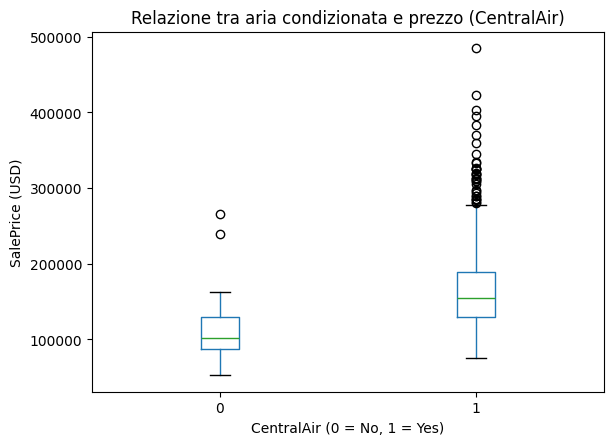

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
df.boxplot(column='SalePrice', by='central_air_num', grid=False)
plt.title('Relazione tra aria condizionata e prezzo (CentralAir)')
plt.suptitle('')
plt.xlabel('CentralAir (0 = No, 1 = Yes)')
plt.ylabel('SalePrice (USD)')
plt.show()


In [54]:
df['GarageType'].value_counts(dropna=False)


GarageType
Attchd      587
Detchd      285
NoGarage     54
BuiltIn      49
Basment      11
2Types        3
CarPort       3
Name: count, dtype: int64

<Figure size 800x500 with 0 Axes>

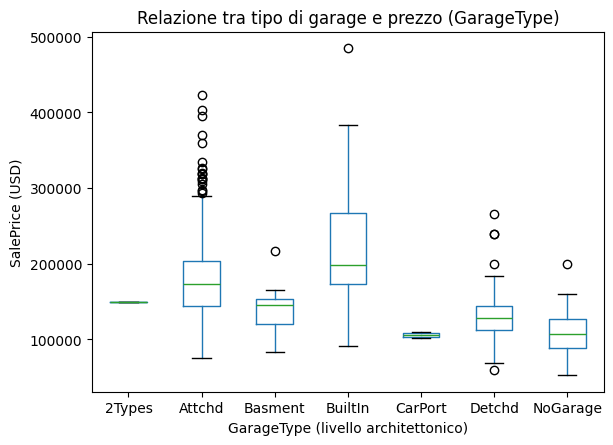

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column='SalePrice', by='GarageType', grid=False)
plt.title('Relazione tra tipo di garage e prezzo (GarageType)')
plt.suptitle('')
plt.xlabel('GarageType (livello architettonico)')
plt.ylabel('SalePrice (USD)')
plt.show()


In [56]:
garage_map = {
    'NoGarage': 0,
    'NA': 0,
    'CarPort': 1,
    'Detchd': 2,
    'Basment': 2.5,
    'Attchd': 3,
    'BuiltIn': 4,
    '2Types': 4.5
}

df['garage_num'] = df['GarageType'].map(garage_map)
df = df.drop(columns=['GarageType'])

print(df['garage_num'].value_counts().sort_index())


garage_num
0.0     54
1.0      3
2.0    285
2.5     11
3.0    587
4.0     49
4.5      3
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

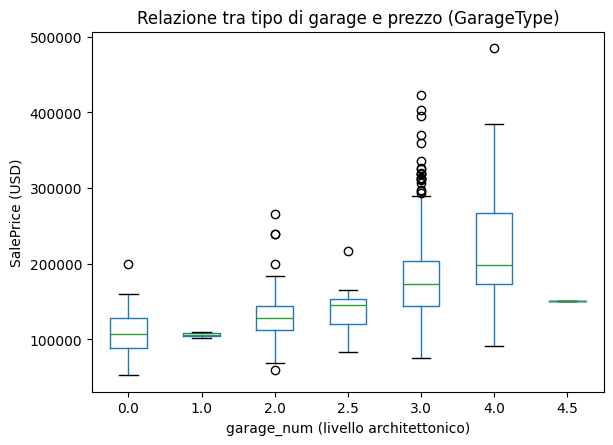

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column='SalePrice', by='garage_num', grid=False)
plt.title('Relazione tra tipo di garage e prezzo (GarageType)')
plt.suptitle('')
plt.xlabel('garage_num (livello architettonico)')
plt.ylabel('SalePrice (USD)')
plt.show()


In [58]:
df['GarageFinish'].value_counts(dropna=False)


GarageFinish
Unf         439
RFn         295
Fin         204
NoGarage     54
Name: count, dtype: int64

In [59]:
# Mappa numerica basata sul livello di finitura
garage_finish_map = {
    'NoGarage': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
}

# Crea la nuova colonna numerica
df['garage_finish_num'] = df['GarageFinish'].map(garage_finish_map)

# Rimuove la colonna originale
df = df.drop(columns=['GarageFinish'])

# Controllo rapido
print(df['garage_finish_num'].value_counts().sort_index())


garage_finish_num
0     54
1    439
2    295
3    204
Name: count, dtype: int64


PavedDrive

In [60]:
df['PavedDrive'].value_counts(dropna=False)


PavedDrive
Y    921
N     56
P     15
Name: count, dtype: int64

N	Nessuna pavimentazione (terra o ghiaia)	Tipico di abitazioni rurali o più vecchie	 Basso
P	Parzialmente pavimentato	Transizione o casa con interventi parziali  Medio
Y	Completamente pavimentato	Standard moderno urbano, comfort e accessibilità Alto

In [61]:
paveddrive_map = {
    'N': 0,   # No pavement
    'P': 0.5, # Partial
    'Y': 1    # Full pavement
}

df['paveddrive_num'] = df['PavedDrive'].map(paveddrive_map)
df = df.drop(columns=['PavedDrive'])  # elimina la colonna originale

print(df['paveddrive_num'].value_counts().sort_index())


paveddrive_num
0.0     56
0.5     15
1.0    921
Name: count, dtype: int64


In [62]:
print(df['MiscFeature'].unique())
df['MiscFeature'].value_counts(dropna=False)


[0 1 2]


MiscFeature
0    952
1     39
2      1
Name: count, dtype: int64

In [63]:
print( "\n ______________________INFO________________\n")
print(df.info())


 ______________________INFO________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Split              992 non-null    object 
 1   Id                 992 non-null    int64  
 2   LotArea            992 non-null    int64  
 3   YearBuilt          992 non-null    float64
 4   YearRemodAdd       992 non-null    int64  
 5   TotalBsmtSF        992 non-null    int64  
 6   1stFlrSF           992 non-null    int64  
 7   2ndFlrSF           992 non-null    int64  
 8   GrLivArea          992 non-null    int64  
 9   BsmtFullBath       992 non-null    int64  
 10  FullBath           992 non-null    int64  
 11  BedroomAbvGr       992 non-null    int64  
 12  KitchenAbvGr       992 non-null    int64  
 13  TotRmsAbvGrd       992 non-null    int64  
 14  Fireplaces         992 non-null    int64  
 15  GarageYrBlt        992 non-n

In [67]:
df.head(10)


,Split,Id,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice,mszoning_num,HasMiscFeature,HouseStyle_num,st_grvl_pave,ut_allpub_nosewa,land_slope_ord,roof_style_num,foundation_num,heating_num,electrical_num,central_air_num,garage_num,garage_finish_num,paveddrive_num
0,labeled,1,6173,1967.0,1967,876,902,0,902,0,1,3,1,6,0,1967.0,1,288,0,0,0,0,125500.0,3.0,0,1.0,1,1,0,2.0,2.0,3.0,3.0,1,3.0,1,1.0
1,labeled,2,11200,1985.0,1985,1298,1298,0,1298,1,2,3,1,5,1,1985.0,2,403,26,0,0,0,180000.0,3.0,0,1.0,1,1,0,2.0,2.0,3.0,3.0,1,3.0,1,1.0
2,labeled,3,11924,2005.0,2006,1175,1182,1142,2324,1,3,4,1,11,2,2005.0,3,736,21,0,0,0,345000.0,3.0,0,5.0,1,1,0,3.0,3.0,3.0,3.0,1,4.0,3,1.0
3,labeled,4,6882,1914.0,2006,684,773,582,1355,0,1,3,1,7,0,0.0,0,0,0,115,0,0,127000.0,2.0,0,5.0,1,1,0,2.0,3.0,3.0,3.0,1,0.0,0,1.0
4,labeled,5,4280,1913.0,2002,440,694,0,694,0,1,2,1,4,1,1990.0,1,352,0,34,0,0,90350.0,3.0,0,1.0,1,1,0,2.0,3.0,3.0,3.0,0,2.0,1,0.5
5,labeled,6,4800,1916.0,1990,1196,1196,0,1196,1,1,2,1,5,0,1957.0,2,440,0,0,0,0,109900.0,2.0,0,1.0,1,1,0,2.0,2.0,3.0,2.0,1,2.0,1,1.0
6,labeled,7,16381,1969.0,1969,1844,1844,0,1844,1,2,3,1,7,1,1969.0,2,540,73,216,0,0,223000.0,3.0,0,1.0,1,1,0,2.0,2.0,3.0,3.0,1,3.0,2,1.0
7,labeled,8,2308,1974.0,1974,855,855,467,1322,0,2,3,1,6,1,1974.0,2,440,0,0,0,0,147000.0,3.0,0,5.0,1,1,0,2.0,2.0,3.0,3.0,1,3.0,1,1.0
8,labeled,9,9738,1924.0,1950,784,949,272,1221,1,1,4,1,7,0,1965.0,1,392,0,236,0,0,104900.0,3.0,0,2.0,1,1,0,2.0,1.0,3.0,3.0,1,3.0,1,1.0
9,labeled,10,9000,1971.0,1971,864,864,0,864,0,1,3,1,5,0,1974.0,2,528,0,0,0,0,120500.0,3.0,0,1.0,1,1,0,2.0,3.0,3.0,3.0,1,2.0,1,1.0


In [68]:
print("NaN por columna:")
print(df.isna().sum())

NaN por columna:
Split                  0
Id                     0
LotArea                0
YearBuilt              0
YearRemodAdd           0
TotalBsmtSF            0
1stFlrSF               0
2ndFlrSF               0
GrLivArea              0
BsmtFullBath           0
FullBath               0
BedroomAbvGr           0
KitchenAbvGr           0
TotRmsAbvGrd           0
Fireplaces             0
GarageYrBlt            0
GarageCars             0
GarageArea             0
OpenPorchSF            0
EnclosedPorch          0
PoolArea               0
MiscFeature            0
SalePrice            198
mszoning_num           2
HasMiscFeature         0
HouseStyle_num         0
st_grvl_pave           0
ut_allpub_nosewa       0
land_slope_ord         0
roof_style_num         0
foundation_num         0
heating_num            0
electrical_num         0
central_air_num        0
garage_num             0
garage_finish_num      0
paveddrive_num         0
dtype: int64


In [69]:
df[df['mszoning_num'].isna()]

,Split,Id,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice,mszoning_num,HasMiscFeature,HouseStyle_num,st_grvl_pave,ut_allpub_nosewa,land_slope_ord,roof_style_num,foundation_num,heating_num,electrical_num,central_air_num,garage_num,garage_finish_num,paveddrive_num
610,labeled,611,8712,1900.0,1950,859,859,319,1178,0,1,2,1,7,0,1964.0,1,384,0,98,0,0,102776.0,NaN,0,2.0,1,1,1,2.0,2.7,3.0,3.0,1,2.0,2,0.0
901,leaderboard,902,11040,1920.0,1950,637,897,439,1336,0,1,3,1,7,0,1994.0,1,570,47,120,0,0,NaN,NaN,0,2.0,1,1,1,2.0,2.0,3.0,3.0,1,1.0,1,1.0


In [70]:
df['mszoning_num'].describe()


count    990.000000
mean       2.819596
std        0.429993
min        1.000000
25%        3.000000
50%        3.000000
75%        3.000000
max        3.200000
Name: mszoning_num, dtype: float64

La moda es 3.0, y como todos los cuartiles (25%, 50%, 75%) son iguales, casi todos los valores son 3. Por eso lo más lógico sería rellenar los NaN con 3.0:

In [71]:
df['mszoning_num'].fillna(3.0, inplace=True)


C:\Users\Alumne_mati1\AppData\Local\Temp\ipykernel_13636\2485158761.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mszoning_num'].fillna(3.0, inplace=True)


In [72]:
df[df['mszoning_num'].isna()]

,Split,Id,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,MiscFeature,SalePrice,mszoning_num,HasMiscFeature,HouseStyle_num,st_grvl_pave,ut_allpub_nosewa,land_slope_ord,roof_style_num,foundation_num,heating_num,electrical_num,central_air_num,garage_num,garage_finish_num,paveddrive_num


In [73]:
print("NaN por columna:")
print(df.isna().sum())

NaN por columna:
Split                  0
Id                     0
LotArea                0
YearBuilt              0
YearRemodAdd           0
TotalBsmtSF            0
1stFlrSF               0
2ndFlrSF               0
GrLivArea              0
BsmtFullBath           0
FullBath               0
BedroomAbvGr           0
KitchenAbvGr           0
TotRmsAbvGrd           0
Fireplaces             0
GarageYrBlt            0
GarageCars             0
GarageArea             0
OpenPorchSF            0
EnclosedPorch          0
PoolArea               0
MiscFeature            0
SalePrice            198
mszoning_num           0
HasMiscFeature         0
HouseStyle_num         0
st_grvl_pave           0
ut_allpub_nosewa       0
land_slope_ord         0
roof_style_num         0
foundation_num         0
heating_num            0
electrical_num         0
central_air_num        0
garage_num             0
garage_finish_num      0
paveddrive_num         0
dtype: int64


In [76]:
df.to_csv('gb_house_pricing.csv', index=False)


### High correlations

Decide what to do with features that are very highly correlated, if any.

NON HO FATTO NESSUNA CORRELAZIONE 